In [1]:
import os

In [2]:
print(os)

<module 'os' from 'C:\\Users\\14029\\anaconda3\\lib\\os.py'>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
##Set up the style of plots

plt.style.use('dark_background')

In [7]:
##et up DF

df = pd.read_csv('superbowl.csv')

In [8]:
##View data
df.head(10)

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California
5,Feb 1 2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
6,Feb 2 2014,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey
7,Feb 3 2013,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,Joe Flacco,Mercedes-Benz Superdome,New Orleans,Louisiana
8,Feb 5 2012,XLVI (46),New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana
9,Feb 6 2011,XLV (45),Green Bay Packers,31,Pittsburgh Steelers,25,Aaron Rodgers,Cowboys Stadium,Arlington,Texas


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        54 non-null     object
 1   SB          54 non-null     object
 2   Winner      54 non-null     object
 3   Winner Pts  54 non-null     int64 
 4   Loser       54 non-null     object
 5   Loser Pts   54 non-null     int64 
 6   MVP         54 non-null     object
 7   Stadium     54 non-null     object
 8   City        54 non-null     object
 9   State       54 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB


In [10]:
##Converting date column
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.year

In [11]:
##View basic info
df.describe().round(decimals=3).drop('Date', axis=1)

,Winner Pts,Loser Pts
count,54.000,54.000
mean,30.111,16.204
std,9.766,7.413
min,13.000,3.000
25%,23.250,10.000
50%,30.500,17.000
75%,35.000,21.000
max,55.000,33.000


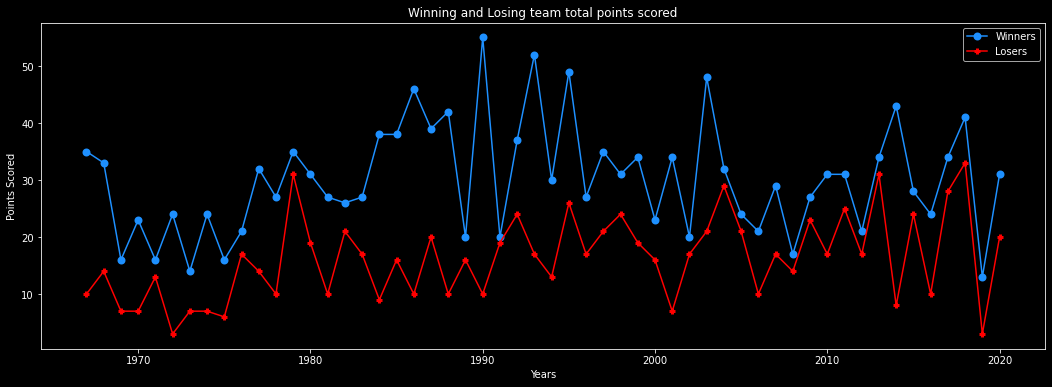

In [18]:
##View info and start EDA -- obviosuly the winning team scored more points but just viewing
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df['Date'], df['Winner Pts'], marker='.', mew=5, color='dodgerblue', label='Winners')
ax.plot(df['Date'],df['Loser Pts'], marker='+', color='red', label='Losers', mew=3)
ax.set_xlabel('Years')
ax.set_ylabel('Points Scored')
ax.set_title('Winning and Losing team total points scored')
ax.legend()
plt.show()

In [13]:
df[df['Winner Pts'] == df['Winner Pts'].max()][['Winner', 'Winner Pts', 'Date']]

,Winner,Winner Pts,Date
30,San Francisco 49ers,55,1990


In [14]:
df[df['Winner Pts'] == df['Winner Pts'].min()][['Winner', 'Winner Pts', 'Date']]

,Winner,Winner Pts,Date
1,New England Patriots,13,2019


In [15]:
##View who has won the most SB
winning_count = pd.DataFrame(df['Winner'].value_counts()).reset_index()
winning_count.index += 1
winning_count.rename(columns = {
    'index':'Team Name',
    'Winner':'Count'
}, inplace=True)

winning_count.sort_values(by='Count', ascending=False, inplace=True)

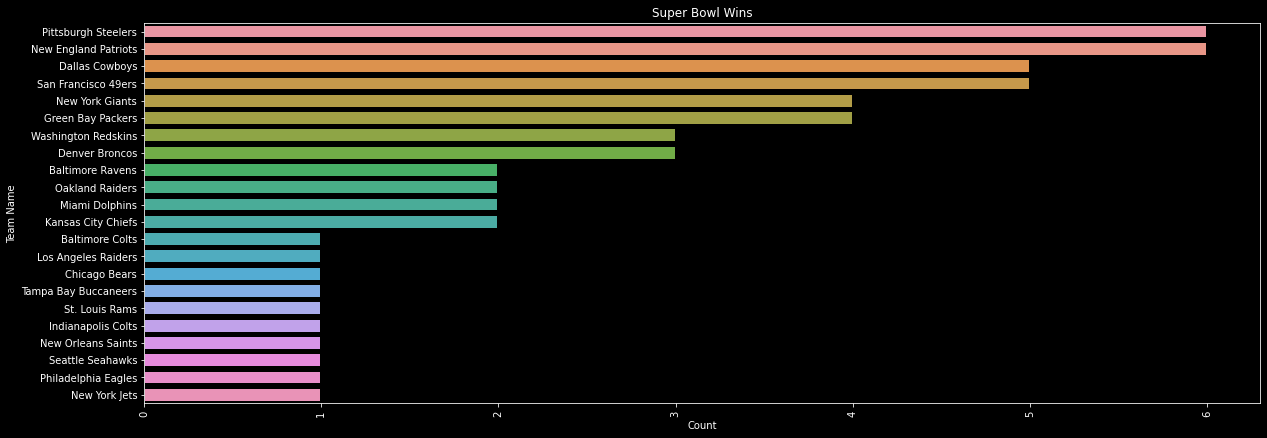

In [17]:
plt.figure(figsize=(20,7))
sns.barplot(y='Team Name', x='Count', data=winning_count,
           edgecolor='black',
           linewidth=2)
plt.title('Super Bowl Wins')
plt.xticks(rotation=90)
plt.show()

In [19]:
losing_count = pd.DataFrame(df['Loser'].value_counts()).reset_index()
losing_count.index += 1
losing_count.rename(columns = {
    'index':'Team Name',
    'Loser':'Count'
}, inplace=True)

losing_count.sort_values(by='Count', ascending=False, inplace=True)

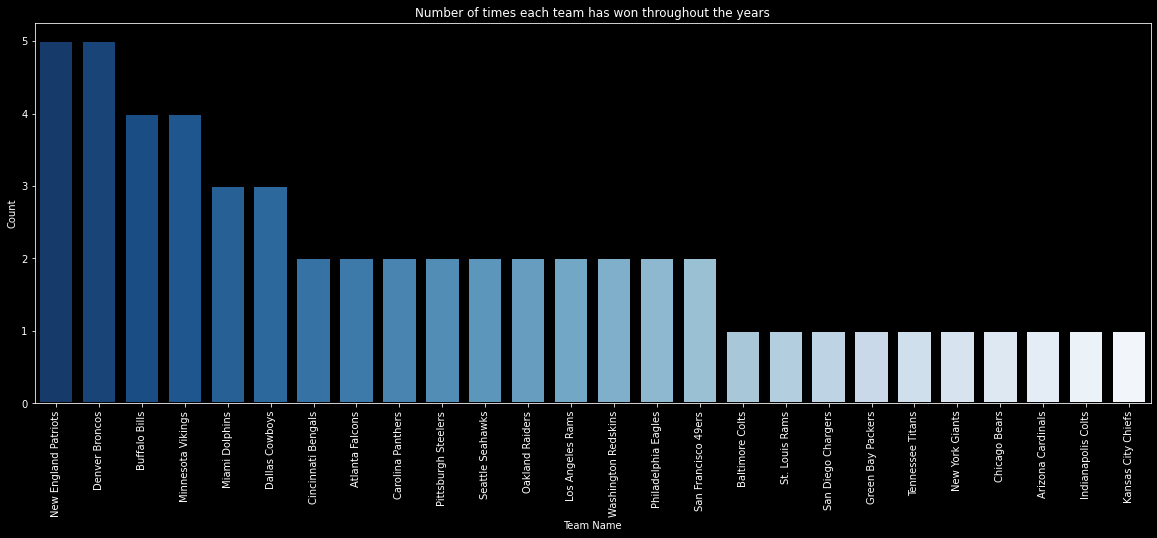

In [20]:
plt.figure(figsize=(20,7))
sns.barplot(x='Team Name', y='Count', data=losing_count,
           edgecolor='black',
           linewidth=2, palette='Blues_r')
plt.title('Number of times each team has won throughout the years')
plt.xticks(rotation=90)
plt.show()

In [21]:
df['Winning Margin'] = df['Winner Pts'] - df['Loser Pts']

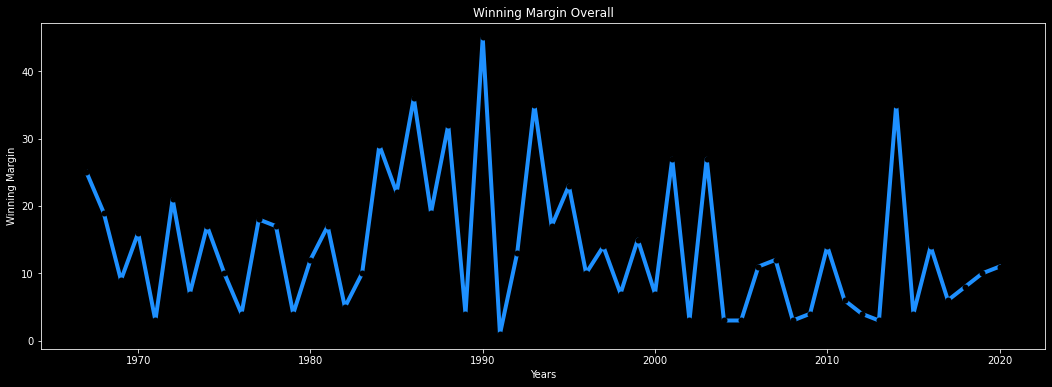

In [23]:
plt.figure(figsize=(18,6))
plt.plot(df['Date'],df['Winning Margin'], marker='.', mew=3, linewidth=4,mec='black', color='dodgerblue')
plt.xlabel('Years')
plt.ylabel('Winning Margin')
plt.title('Winning Margin Overall')
plt.show()

In [24]:
df['Match'] = df['Winner'] + ' vs ' + df['Loser']
df2 = df.sort_values(by='Winning Margin', ascending=False)
df2 = df2.head(10)

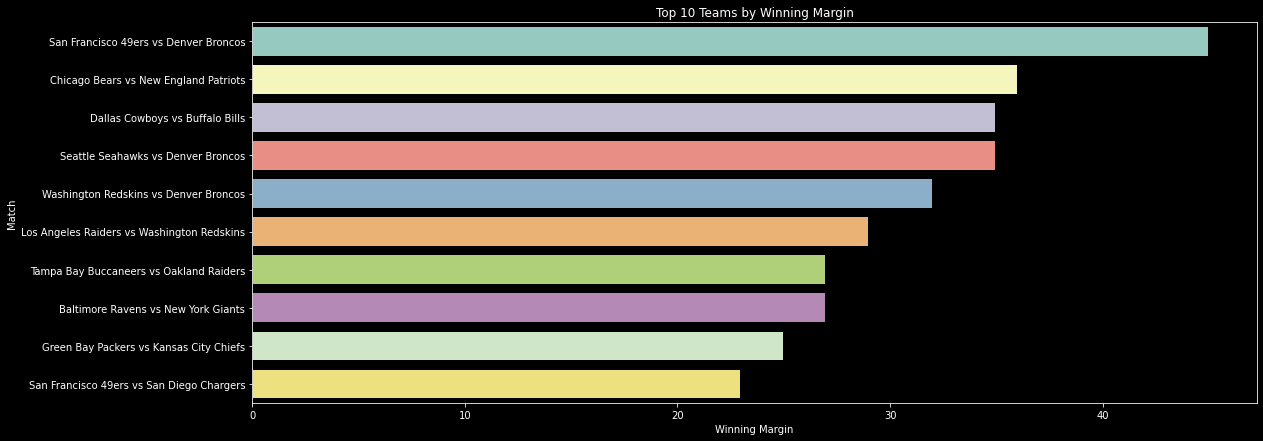

In [28]:
plt.figure(figsize=(18,7))
sns.barplot(y='Match', x='Winning Margin', data=df2,
            edgecolor='black',linewidth=2)
plt.title('Top 10 Teams by Winning Margin')
plt.show()

In [29]:
state_count = pd.DataFrame(df['State'].value_counts()).reset_index()
state_count.index += 1
state_count.rename(columns = {
    'index':'State',
    'State':'Count'
}, inplace=True)

state_count.sort_values(by='Count', ascending=False, inplace=True)

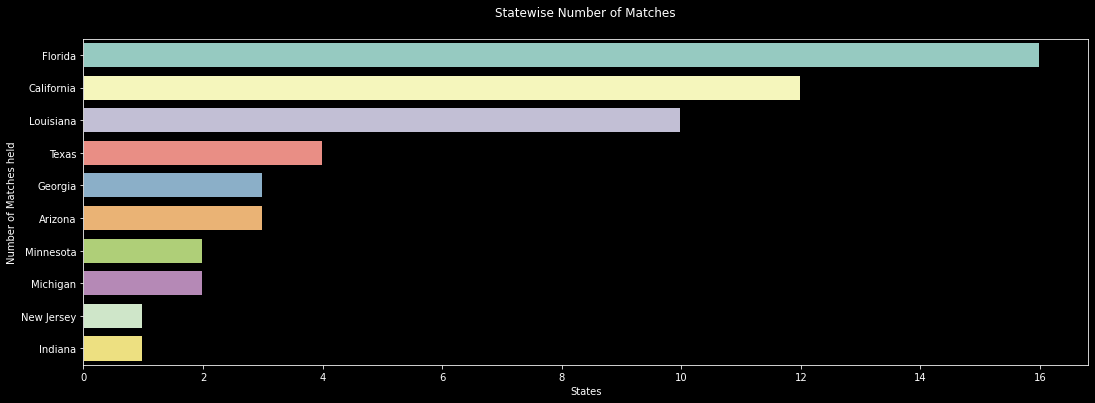

In [30]:
plt.figure(figsize=(18,6))
g = sns.barplot(y='State', x='Count', data=state_count, edgecolor='black', linewidth=2)
g.set_title('Statewise Number of Matches', y=1.05)
g.set(xlabel='States', ylabel='Number of Matches held')
plt.show()

In [31]:
city_count = pd.DataFrame(df['City'].value_counts()).reset_index()
city_count.index += 1
city_count.rename(columns = {
    'index':'City',
    'City':'Count'
}, inplace=True)

city_count.sort_values(by='Count', ascending=False, inplace=True)
city_count = city_count.head()

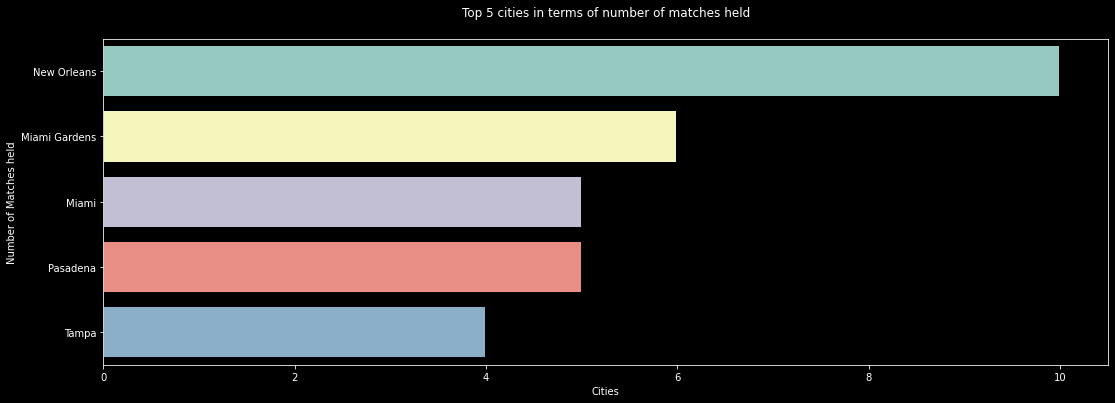

In [32]:
plt.figure(figsize=(18,6))
g = sns.barplot(y='City', x='Count', data=city_count, edgecolor='black',linewidth=2)
g.set_title('Top 5 cities in terms of number of matches held', y=1.05)
g.set(xlabel='Cities', ylabel='Number of Matches held')
plt.show()

In [33]:
mvp_count = pd.DataFrame(df['MVP'].value_counts()).reset_index()
mvp_count.index += 1
mvp_count.rename(columns = {
    'index':'MVP',
    'MVP':'Count'
}, inplace=True)

mvp_count.sort_values(by='Count', ascending=False, inplace=True)
mvp_count = mvp_count.head()

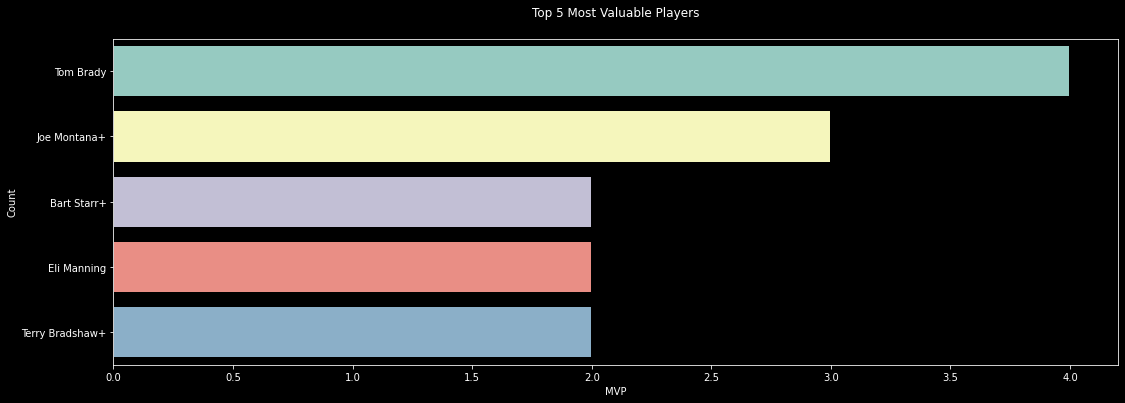

In [34]:
plt.figure(figsize=(18,6))
g = sns.barplot(y='MVP', x='Count', data=mvp_count, edgecolor='black',linewidth=2)
g.set_title('Top 5 Most Valuable Players', y=1.05)
g.set(xlabel='MVP', ylabel='Count')
plt.show()

In [35]:
stadium_count = pd.DataFrame(df['Stadium'].value_counts()).reset_index()
stadium_count.index += 1
stadium_count.rename(columns = {
    'index':'Stadium',
    'Stadium':'Count'
}, inplace=True)

stadium_count.sort_values(by='Count', ascending=False, inplace=True)
stadium_count = stadium_count.head(4)

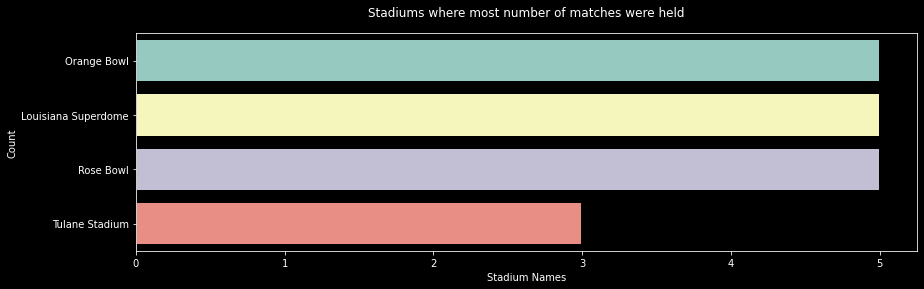

In [36]:
plt.figure(figsize=(14,4))
g = sns.barplot(y='Stadium', x='Count', data=stadium_count, edgecolor='black',linewidth=2)
g.set_title('Stadiums where most number of matches were held', y=1.05)
g.set(xlabel='Stadium Names', ylabel='Count')
plt.show()